<a href="https://colab.research.google.com/github/Skula33/FDSfE_SKulakowski/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing our Packages:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Idea:

Citibike usage would be different by gender if the bikes are more comfortable for people who are taller and with larger frames.

### Developing our $H_o$:

So partitioning by gender, we want to analyze whether or not this hypothesis holds true: 
$$
\mu_{1} = \mu_{2}
$$
Where we are essentially comparing the average trip duration of our sample of men and women. So we are essentially using this null hypothesis for 2 samples of data.

### Developing our $H_{a}$:

Conversely, we condsider the following for our alternative hypothesis:
$$
\mu_{1} \neq \mu_{2}
$$
Looks good. We would want to consider the statistician's standard rejection region to consider for our hypothesis test:
$$
\alpha = 0.05
$$
What does this mean? Well, we are essentially considering to the 95% significance that the conclusion of our hypothesis test is true.

In [2]:
# So we're setting our alpha to 0.05, this can also be represented as our probability rejection region
# meaning that if our hypothesis test provides a probability lesser than this value, we would reject the null...

pvalue = 0.05

# <mark>WFF</mark> Fantastic!

# Reading in Our Data:

In [3]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")

# Exploratory Data Analysis:

In [4]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [5]:
print("The cbMay19 dataframe has the following dimensions:",cbMay19.shape)

The cbMay19 dataframe has the following dimensions: (1924563, 15)


In [6]:
cbMay19.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tripduration,1924563.0,1067.189137,12546.359986,61.000000,379.000000,653.000000,1158.000000,2.922656e+06
start station id,1924563.0,1671.397195,1473.509066,72.000000,382.000000,516.000000,3293.000000,3.790000e+03
start station latitude,1924563.0,40.736979,0.030622,40.655400,40.717400,40.737262,40.757570,4.081439e+01
start station longitude,1924563.0,-73.982227,0.019701,-74.025353,-73.995951,-73.985180,-73.971212,-7.390774e+01
end station id,1924563.0,1664.596165,1473.196169,72.000000,380.000000,515.000000,3292.000000,3.790000e+03
end station latitude,1924563.0,40.736745,0.030488,40.655400,40.717227,40.737050,40.757148,4.081439e+01
end station longitude,1924563.0,-73.982483,0.019763,-74.068601,-73.996010,-73.985836,-73.971518,-7.390774e+01
bikeid,1924563.0,27128.611155,6404.187636,14529.000000,20826.000000,28782.000000,32576.000000,3.800200e+04
birth year,1924563.0,1979.833192,11.992133,1885.000000,1969.000000,1982.000000,1990.000000,2.003000e+03
gender,1924563.0,1.152992,0.551678,0.000000,1.000000,1.000000,1.000000,2.000000e+00


What can we conclude from the following?? Well, we can see that there are A LOT of datapoints in this dataframe with almost 2 million observations in the dataframe, we can also see that this dataframe has 15 features for each observation. We can also see that our numeric columns don't have any missing values which is pretty interesting considering a dataset of this size...

We can also see an average trip duration of ~1067.2 seconds, a standard deviation of ~12546.36 seconds for all citibike users.

# Trip duration distribution:

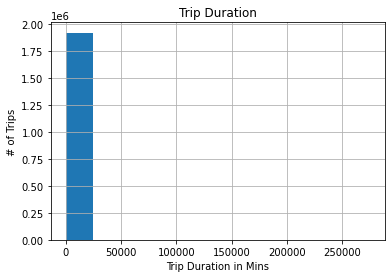

In [7]:
plt.hist(x = cbMay19['tripduration'], bins = np.arange(0, 300000, 25000));
plt.xlabel('Trip Duration in Mins')
plt.ylabel('# of Trips')
plt.title('Trip Duration')
plt.grid()

# This is a little different from your plot in the hw outline on the x axis but visibly looks the same...

In [8]:
# removing datapoints that seem... off, where tripduration is less than a whole day
# 1440 mins in a day
cbMay19_clean = cbMay19[cbMay19["tripduration"] < 1440]

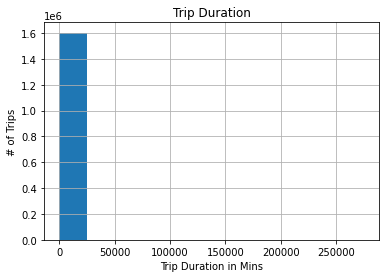

In [9]:
# Remaking histogram with clean data...
plt.hist(x = cbMay19_clean['tripduration'], bins = np.arange(0, 300000, 25000));
plt.xlabel('Trip Duration in Mins')
plt.ylabel('# of Trips')
plt.title('Trip Duration')
plt.grid()

# <mark>WFF</mark> Missing figure caption. Also this isn't quite the plot that we were looking for once you cleaned the data. This plot still doesn't really show any of the detail of the data.

# Data Wrangling:

We will be partitioning our dataset into our proper representation of males and females, plotting the distribution of data for males and females on the same axes, respectively.

In [10]:
men = cbMay19_clean[cbMay19_clean['gender'] == 1]
women = cbMay19_clean[cbMay19_clean['gender'] == 2]

Text(0.5, 1.0, 'Trip Duration')

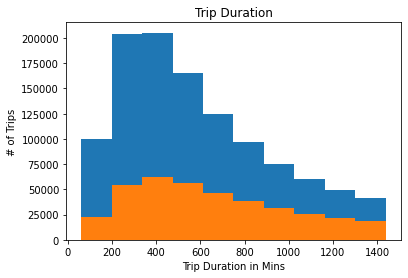

In [11]:
plt.hist(men['tripduration'])
plt.hist(women['tripduration'])
plt.xlabel('Trip Duration in Mins')
plt.ylabel('# of Trips')
plt.title('Trip Duration')

We can state from the following figure that there are a significantly larger quantity of trips for males than females regardless of trip duration. It seems that our average trip duration is a little greater for women than it is for men.

# Statistical Analysis:

We will be running a t-test along with a KS test for the following distributions...

In [12]:
stats.ttest_ind(men['tripduration'], women['tripduration'], axis = 0)

Ttest_indResult(statistic=-100.84403665697793, pvalue=0.0)

We can state from our t-test statistic that there is a significant difference between the mean of our male distribution and our female distribution.

In [13]:
stats.kstest(men['tripduration'], women['tripduration'])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

In [14]:
#men['tripduration'].mean()
#women['tripduration'].mean()

So from our statistical tests we can state that there is a significant difference between the average bike-ride duration times of men and women in our dataset to the 95% confidence.

# Are our Distributions the same??:
Considering our null hypothesis, we assume that the numbers are uniformly distributed between 0-1. If we are able to reject the Null Hypothesis, this means that the numbers are not uniformly distributed between 0-1. 

In [15]:
stats.ks_2samp(men['tripduration'], women['tripduration'])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

We can see that our distributions are pretty different. Due to the fact that our p-value of our KS-test is 0.0, we can state that there is a different distribution between the men and women in our distribution.

In [16]:
normed_f = (women["tripduration"] - women["tripduration"].mean()) / women["tripduration"].std()
normed_m = (men["tripduration"] - men["tripduration"].mean()) / men["tripduration"].std()

#Re-running our test for normalization:

In [17]:
stats.ks_2samp(normed_m, normed_f)

KstestResult(statistic=0.022785464212612745, pvalue=1.4148236782790818e-127)

Our p-value seems to increase a slight amount! But not enough to not reject the null Hypothesis. I will definately look at the Extra-Credit tomorrow....